##### RQ1: Which loss configuration performs generally better across different cases? 

This RQ evaluates the use of FairST with the four proposed disentanglement losses and their pairwise combinations. While the best-performing loss will vary based on the classification task and the dataset, we aim to select a combination that has good and reliable performance across different classification tasks. Such a combination will then be used within FairST to answer the subsequent RQs.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *


pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


# SAVE TO RESULTS FILE

In [2]:
FOLDER = "RQ123_MEAN_METRICS"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

In [4]:

for attr in [["sex"],["race"],["race", "sex"]]:     
    files = [os.path.join("results","RESULTS_"+'_'.join(attr)+".csv")]        
    
    reader = ResultsReader(files)
    
    df = reader.get_mean_metrics()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_MEAN_"+'_'.join(attr)+'.csv'), index=False)
    
    df = reader.get_filtered_df()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).std().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_STD_"+'_'.join(attr)+'.csv'), index=False)



File 'results\RESULTS_sex.csv' successfully loaded as DataFrame.


File 'results\RESULTS_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_race_sex.csv' successfully loaded as DataFrame.


In [5]:

for attr in [["sex"],["race"],["race", "sex"]]:     
    files = [os.path.join("results","RESULTS_with_no_vae_"+'_'.join(attr)+".csv")]        
    
    reader = ResultsReader(files)

    df = reader.get_mean_metrics()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).mean().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_MEAN_no_vae_"+'_'.join(attr)+'.csv'), index=False)
    
    df = reader.get_filtered_df()
    df = df[(df[reader.ML].str.contains('nn'))]
    mean_df = df.groupby(reader.filterable).std().reset_index()
    mean_df.to_csv(os.path.join(FOLDER,"NN_STD_no_vae_"+'_'.join(attr)+'.csv'), index=False)



File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
File 'results\RESULTS_with_no_vae_race_sex.csv' successfully loaded as DataFrame.


In [6]:
FOLDER = "RQ1_LOSS_SELECTION"

if not os.path.exists(FOLDER):
    os.makedirs(FOLDER)

# VIS

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

### MEAN VAL all losses vs baseline for NN (7) F1 vs SF

In [8]:
size = 3

In [9]:
def f(df, reader = None): # Keep only baseline and my losses for NN
    df = df[(df["ML method"].str.contains('nn'))]
    df = df[(df["bias mitigation"].str.contains('FYP VAE')) | df["bias mitigation"].str.contains('No') ]
    return df

In [10]:

files, datasets, titles = get_all_result_files(True)

File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['race|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_sex.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness f1score  | all found  ['sex|[SF] Statistical Parity Subgroup Fairness for One Attribute', '[SF] Statistical Parity Subgroup Fairness'] ['f1score']
File 'results\RESULTS_with_no_vae_race.csv' successfully loaded as DataFrame.
metrics to display: [SF] Statistical Parity Subgroup Fairness 

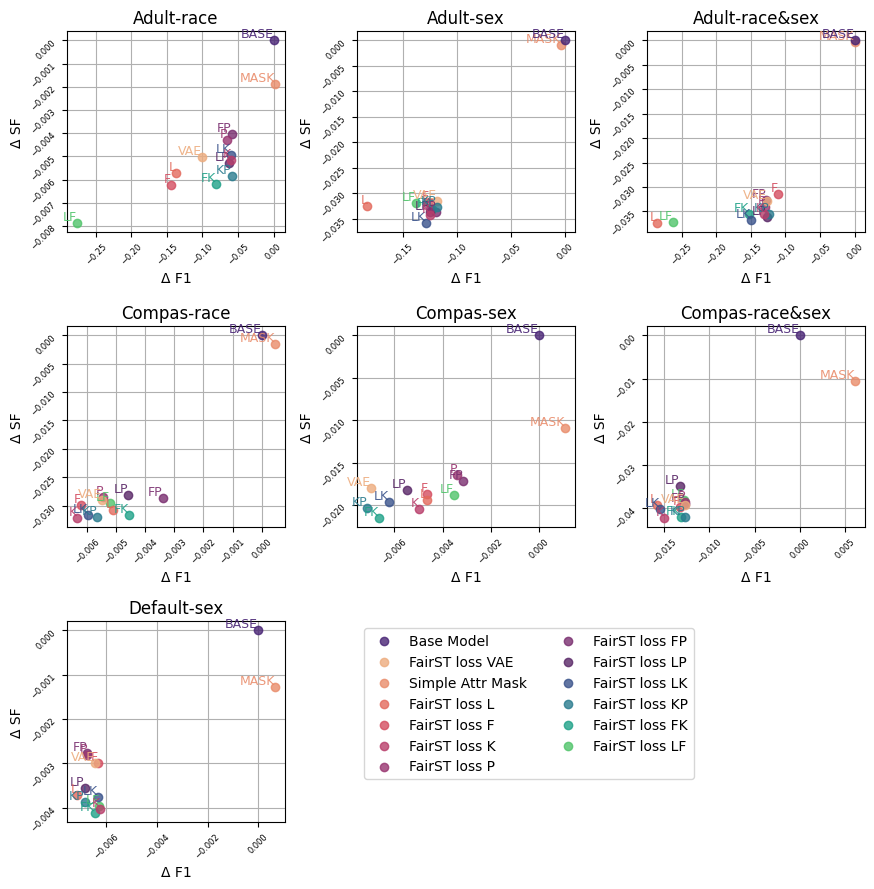

In [15]:
# ALL MODELS
F, axes = plt.subplots(3, 3, figsize=(size*(3), size*3))
locs = [(2,0),(0,0),(0,1),(1,0),(1,1),(0,2),(1,2)]
labels  = ['BASE',"VAE","MASK","L","F","K","P","FP","LP","LK","KP","FK","LF"]


for i in range(7):
    y,x = locs[i]
    #axes[y][x].set_prop_cycle(marker=['o', '+', 'x', '*', '.', 'X'])
    plot_one_run(f, files[i], datasets[i], axes[y][x])
    axes[y][x].set_title(titles[i])
    axes[y][x].set_ylabel("Δ SF") # comment out to make sure 
    axes[y][x].set_xlabel("Δ F1")
   

plt.tight_layout() 
add_legend(axes[2][1], labels,2)
axes[2][2].axis('off')
plt.rc('axes', axisbelow=True)
plt.savefig('imgs/RQ1_all_losses_F1_SF.png')
plt.show()

In [12]:
labels  = ['BASE',"VAE","MASK","L","F","K","P","FP","LP","LK","KP","FK","LF"]

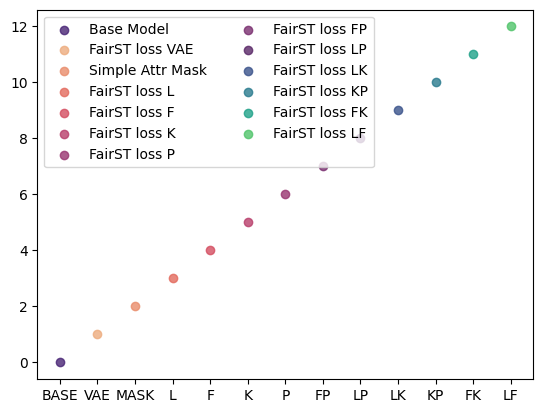

In [13]:
# LEGEND!
grapher = ResultsGrapher(None)
labels  = ['BASE', "MASK", "VAE","LF","FK","LK","LP","P","K","L","FP", "F","KP","B:FM","B:FB", "B:RW","B:LFR"]
labels  = ['BASE',"VAE","MASK","L","F","K","P","FP","LP","LK","KP","FK","LF"]
for i, l in enumerate(labels):
    plt.scatter(
            l,
            i,
            label=grapher._get_legend_text(l, l),
            color=grapher.get_color(l),
            alpha=0.8,
        )
plt.legend(ncol=2)
plt.show()
